In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import zipfile
import json

country = 'new_york'
main_color = 'red'
#models = ['DG', 'G', 'MFG', 'NG']
model = 'DG'
rounds = ['0']

# Standard Plots

In [2]:
dfs = []
for r in rounds:
#    for model in models:
        filename = 'tile2cpc_' + model + '_' + country + '_' + r + '.csv'
        df = pd.read_csv('../DeepGravity/results/'+filename)
        df.set_index('tile', inplace=True)
        df.fillna(0, inplace=True)
        df.rename(columns={'cpc': r + '_' + model}, inplace=True)
        dfs.append(df)
    
df = dfs[0]
    
for d in dfs[1:]:
    df = df.join(d)

archive = zipfile.ZipFile('../DeepGravity/deepgravity/data/'+ country + '/processed/tileid2oa2handmade_features.json.zip', 'r')
with archive.open('tileid2oa2handmade_features.json') as f:
    tileid2oa2features2vals = json.load(f)
    
df.reset_index(inplace=True)
df = df[df['tile'] != 0]
areas = list(df['tile'].unique())
tile_sizes = []
for area in areas:
    tile_sizes.append(len(tileid2oa2features2vals[str(area)].keys()))

In [3]:
df['n_oas'] = tile_sizes

In [4]:
df['n_oas'] = df['n_oas'].drop_duplicates()
deciles_n_oas = pd.qcut(df['n_oas'], q=10, labels=False)


In [5]:
deciles_n_oas = pd.qcut(df['n_oas'], q=10, labels=False, duplicates='drop')


In [6]:
df

,tile,0_DG,n_oas
0,10,0.454458,2.0
1,101,0.517787,3.0
2,103,0.527456,7.0
3,104,0.519992,6.0
4,107,0.547992,9.0
...,...,...,...
183,93,0.482530,25.0
184,94,0.438534,NaN
185,97,0.470899,NaN
186,98,0.499343,NaN


In [7]:
if country == 'ny' or country == 'ny10' or country == 'socal':
    #df = df[df.n_oas >= 3]
    df['rank_oa'] = df['n_oas'].rank(method='first')
    deciles_n_oas = pd.qcut(df['rank_oa'], q=10, labels=False)
else:
    deciles_n_oas = pd.qcut(df['n_oas'], q=10, labels=False)
df['decile_n_oas'] = deciles_n_oas

df['DG'] = df[[x + '_DG' for x in rounds]].mean(axis=1)
#df['G'] = df[[x + '_G' for x in rounds]].mean(axis=1)
#df['NG'] = df[[x + '_NG' for x in rounds]].mean(axis=1)
#df['MFG'] = df[[x + '_MFG' for x in rounds]].mean(axis=1)
#df['DGsum'] = df[[x + '_DGsum' for x in rounds]].mean(axis=1)

df.rename(columns = {'DG': 'deep', 'G': 'original_p', 'MFG': 'original', 'NG': 'deep_p'}, inplace=True)
df = df.sort_values(by='decile_n_oas')

In [8]:
country_to_string = {
    'new_york': 'New York'
}

country_to_subid = {
    'new_york': ['a)', 'b)']
}

In [9]:
df

,tile,0_DG,n_oas,decile_n_oas,deep
0,10,0.454458,2.0,0.0,0.454458
1,101,0.517787,3.0,0.0,0.517787
6,111,0.000000,1.0,0.0,0.000000
5,110,0.000000,4.0,0.0,0.000000
17,147,0.492675,5.0,1.0,0.492675
...,...,...,...,...,...
182,91,0.491149,NaN,NaN,0.491149
184,94,0.438534,NaN,NaN,0.438534
185,97,0.470899,NaN,NaN,0.470899
186,98,0.499343,NaN,NaN,0.499343


In [10]:
df_temp

NameError: name 'df_temp' is not defined

ValueError: 'x' and 'y' must have the same size

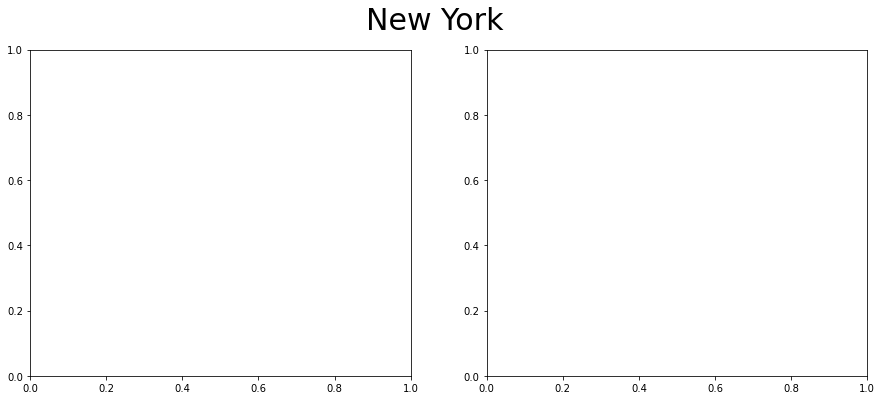

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

st = fig.suptitle(country_to_string[country], fontsize=30)

#avg_originals, avg_deeps, avg_originals_p, avg_deeps_p, avg_dg_sums = [], [], [], [], []
#std_originals, std_deeps, std_originals_p, std_deeps_p, std_dg_sums = [], [], [], [], []

avg_deeps = []
std_deeps = []

for decile in df.decile_n_oas.unique():
    df_temp = df[df.decile_n_oas == decile]

    avg_deep = df_temp.deep.mean()
    #avg_original_p = df_temp.original_p.mean()
   # avg_deep_p = df_temp.deep_p.mean()
   # avg_original = df_temp.original.mean()

    avg_deeps.append(avg_deep)
  #  avg_originals_p.append(avg_original_p)
   # avg_deeps_p.append(avg_deep_p)
  #  avg_originals.append(avg_original)

    std_deep = df_temp.deep.std()
   # std_original_p = df_temp.original_p.std()
   # std_deep_p = df_temp.deep_p.std()
   # std_original = df_temp.original.std()

    std_deeps.append(std_deep)
   # std_originals_p.append(std_original_p)
   # std_deeps_p.append(std_deep_p)
   # std_originals.append(std_original)

    relative_improve_original_p_deep = []
   # relative_improve_original_p_deep_p = []
  #  relative_improve_original_p_original = []

#for a, b in zip(avg_originals_p, avg_deeps):
 #   relative_improve_original_p_deep.append(((b - a) / a)*100)

#for a, b in zip(avg_originals_p, avg_deeps_p):
#    relative_improve_original_p_deep_p.append(((b - a) / a)*100)

# for a, b in zip(avg_originals_p, avg_originals):
#    relative_improve_original_p_original.append(((b - a) / a)*100)

# decile plots
ax = axes[0]

ax.errorbar(range(10), avg_deeps, yerr=std_deeps, marker='o',
          color=main_color, label='DG', linewidth=3, markersize=10)

#ax.errorbar(range(10), avg_deeps_p, yerr=std_deeps_p, marker='v',
#          color='lightgrey', label='NG', linewidth=2, markersize=10)  

#ax.errorbar(range(10), avg_originals_p, yerr=std_originals_p,
#          color='black', label='G', linestyle='--', linewidth=3)  


#ax.errorbar(range(10), avg_originals, yerr=std_originals, marker='s',
#          color='darkgrey', linewidth=2, 
#          label='MFG', markersize=8)

ax.set_ylabel('Average CPC', fontsize=25)
ax.set_xlabel('Decile population', fontsize=25)
ax.set_xticks(range(10))
ax.set_xticklabels(range(1, 11))
ax.set_ylim(0,1)
ax.tick_params(labelsize=20)
ax.grid(alpha=0.2)
ax.set_title(country_to_subid[country][0], fontsize=30)
ax.legend(fontsize=20, loc=1)

# relative improvement plot

ax = axes[1]

ax.plot(range(len(relative_improve_original_p_deep)), relative_improve_original_p_deep, color=main_color, linewidth=3, 
      marker='o', markersize=10)

#ax.plot(range(len(relative_improve_original_p_deep_p)), relative_improve_original_p_deep_p, color='lightgrey', linewidth=2, 
 #     marker='v', markersize=8)

#ax.plot(range(len(relative_improve_original_p_original)), relative_improve_original_p_original, color='darkgrey', linewidth=2, 
 #     marker='s', markersize=10)

ax.set_ylabel('Relative improvement (%)', fontsize=25)
ax.set_xlabel('Decile population', fontsize=25)
ax.set_ylim(0,max(relative_improve_original_p_deep)+max(relative_improve_original_p_deep)*0.1)
ax.tick_params(labelsize=20)
ax.set_title(country_to_subid[country][1], fontsize=30)
ax.grid(alpha=0.2)



plt.subplots_adjust(wspace=0.3)
#fig.suptitle(country2long_name[country], fontsize=20)
plt.tight_layout()
plt.savefig('../plots/average_cpc_'+country+'.pdf')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

st = fig.suptitle(country_to_string[country], fontsize=30)

#avg_originals, avg_deeps, avg_originals_p, avg_deeps_p, avg_dg_sums = [], [], [], [], []
#std_originals, std_deeps, std_originals_p, std_deeps_p, std_dg_sums = [], [], [], [], []

avg_deeps = []
std_deeps = []

for decile in df.decile_n_oas.unique():
    df_temp = df[df.decile_n_oas == decile]

    avg_deep = df_temp.deep.mean()

    avg_deeps.append(avg_deep)

    std_deep = df_temp.deep.std()

    std_deeps.append(std_deep)

    relative_improve_original_p_deep = []


# decile plots
ax = axes[0]

ax.errorbar(range(10), avg_deeps, yerr=std_deeps, marker='o',
          color=main_color, label='DG', linewidth=3, markersize=10)

ax.set_ylabel('Average CPC', fontsize=25)
ax.set_xlabel('Decile population', fontsize=25)
ax.set_xticks(range(10))
ax.set_xticklabels(range(1, 11))
ax.set_ylim(0,1)
ax.tick_params(labelsize=20)
ax.grid(alpha=0.2)
ax.set_title(country_to_subid[country][0], fontsize=30)
ax.legend(fontsize=20, loc=1)

# relative improvement plot

ax = axes[1]

ax.plot(range(len(relative_improve_original_p_deep)), relative_improve_original_p_deep, color=main_color, linewidth=3, 
      marker='o', markersize=10)

    marker='s', markersize=10)

ax.set_ylabel('Relative improvement (%)', fontsize=25)
ax.set_xlabel('Decile population', fontsize=25)
ax.set_ylim(0,max(relative_improve_original_p_deep)+max(relative_improve_original_p_deep)*0.1)
ax.tick_params(labelsize=20)
ax.set_title(country_to_subid[country][1], fontsize=30)
ax.grid(alpha=0.2)



plt.subplots_adjust(wspace=0.3)
#fig.suptitle(country2long_name[country], fontsize=20)
plt.tight_layout()
plt.savefig('../plots/average_cpc_'+country+'.pdf')